# **Atendimento de violência contra a mulher em unidades de saúde: Dados do SINAN)**

    O presente estudo tem como objetivo coletar informações da base de dados do SINAN para traçar um perfil sobre a violência contra as mulheres, abordando as características do ocorrido, das vítimas e de seus agressores.  
    A maioria dos estudos sobre violência contra mulheres se concentram em feminicídio ou então em dados obtidos nas bases da área de segurança pública. Porém muitas mulheres que sofrem esse tipo de violência, por inúmeras razões, decidem não denunciar seu agressor. Já a base do SINAN é alimentada a partir das notificações feitas por unidades de saúde assim que a vítima procura por atendimento e essa notificação é obrigatória. Portanto os dados aqui analisados são de mulheres que precisaram de atendimento após sofrer uma agressão, e não, necessariamente, as que fizeram denúncia à polícia.   

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df_dados_violencia = pd.read_csv("/content/SINAN-VIOL-2017-2019.csv", low_memory=False)
df_dados_violencia.shape

(47126, 161)

In [ ]:
for i in df_dados_violencia.columns:
  print(i)

level_0
level_1
level_2
TP_NOT
ID_AGRAVO
DT_NOTIFIC
SEM_NOT
NU_ANO
SG_UF_NOT
ID_MUNICIP
TP_UNI_EXT
NM_UNI_EXT
CO_UNI_EXT
ID_UNIDADE
ID_REGIONA
ID_RG_RESI
DT_OCOR
SEM_PRI
DT_NASC
NU_IDADE_N
CS_SEXO
CS_GESTANT
CS_RACA
CS_ESCOL_N
SG_UF
ID_MN_RESI
ID_PAIS
NDUPLIC
DT_INVEST
ID_OCUPA_N
SIT_CONJUG
DEF_TRANS
DEF_FISICA
DEF_MENTAL
DEF_VISUAL
DEF_AUDITI
TRAN_MENT
TRAN_COMP
DEF_OUT
DEF_ESPEC
SG_UF_OCOR
ID_MN_OCOR
HORA_OCOR
LOCAL_OCOR
LOCAL_ESPE
OUT_VEZES
LES_AUTOP
VIOL_FISIC
VIOL_PSICO
VIOL_TORT
VIOL_SEXU
VIOL_TRAF
VIOL_FINAN
VIOL_NEGLI
VIOL_INFAN
VIOL_LEGAL
VIOL_OUTR
VIOL_ESPEC
AG_FORCA
AG_ENFOR
AG_OBJETO
AG_CORTE
AG_QUENTE
AG_ENVEN
AG_FOGO
AG_AMEACA
AG_OUTROS
AG_ESPEC
SEX_ASSEDI
SEX_ESTUPR
SEX_PUDOR
SEX_PORNO
SEX_EXPLO
SEX_OUTRO
SEX_ESPEC
PEN_ORAL
PEN_ANAL
PEN_VAGINA
PROC_DST
PROC_HIV
PROC_HEPB
PROC_SANG
PROC_SEMEN
PROC_VAGIN
PROC_CONTR
PROC_ABORT
CONS_ABORT
CONS_GRAV
CONS_DST
CONS_SUIC
CONS_MENT
CONS_COMP
CONS_ESTRE
CONS_OUTR
CONS_ESPEC
LESAO_NAT
LESAO_ESPE
LESAO_CORP
NUM_ENVOLV
REL_SEXUAL
REL

O dataset bruto tem 1.063.056 registros e 161 colunas. Inicialmente exclui os registros das vítimas do sexo masculino e as em que a lesão foi autoprovocada (tentativa de suicídio). Foram escolhidas 31 variáveis e após o processo de limpeza e tratamento dos dados restaram 564.432 registros para serem analisados.

In [ ]:
df_dados_violencia = df_dados_violencia[['level_0', 'level_1','DT_NOTIFIC','DT_OCOR', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO',
                                         'CS_RACA', 'CS_ESCOL_N', 'LOCAL_OCOR', 'LES_AUTOP', 'VIOL_FISIC', 'VIOL_PSICO',
                                         'VIOL_TORT', 'VIOL_SEXU', 'SEX_ASSEDI', 'SEX_ESTUPR', 'SEX_EXPLO', 'SEX_PORNO',
                                         'SEX_OUTRO', 'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ', 'REL_EXCON',
                                         'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO', 'REL_CONHEC', 'REL_DESCO',
                                         'AUTOR_SEXO', 'OUT_VEZES']]

df_dados_violencia.rename(columns = {'level_0': 'UF', 'level_1': 'ANO'}, inplace = True)
df_dados_violencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF          47126 non-null  object 
 1   ANO         47126 non-null  int64  
 2   DT_NOTIFIC  47126 non-null  object 
 3   DT_OCOR     47126 non-null  object 
 4   DT_NASC     45604 non-null  object 
 5   NU_IDADE_N  47126 non-null  float64
 6   CS_SEXO     47126 non-null  object 
 7   CS_RACA     46471 non-null  float64
 8   CS_ESCOL_N  43936 non-null  float64
 9   LOCAL_OCOR  47092 non-null  float64
 10  LES_AUTOP   46311 non-null  float64
 11  VIOL_FISIC  47083 non-null  float64
 12  VIOL_PSICO  46857 non-null  float64
 13  VIOL_TORT   46842 non-null  float64
 14  VIOL_SEXU   46861 non-null  float64
 15  SEX_ASSEDI  46586 non-null  float64
 16  SEX_ESTUPR  46739 non-null  float64
 17  SEX_EXPLO   46562 non-null  float64
 18  SEX_PORNO   46557 non-null  float64
 19  SEX_OUTRO   46351 non-nul

<ipython-input-11-fff6c2bdde66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dados_violencia.rename(columns = {'level_0': 'UF', 'level_1': 'ANO'}, inplace = True)


## **Limpeza e tratamento dos dados**

Esse dataset tem 161 campos, então vamos excluir os campos que não estão relacionados com violência contra a mulher e os que não trazem nenhuma informação que possa ser útil para este estudo.

In [ ]:
df_dados_violencia.dtypes
df_dados_violencia.isna().sum().sort_values()

,0
UF,0
ANO,0
DT_NOTIFIC,0
DT_OCOR,0
NU_IDADE_N,0
CS_SEXO,0
LOCAL_OCOR,34
VIOL_FISIC,43
VIOL_SEXU,265
VIOL_PSICO,269


Como o objetivo do estudo é fazer uma análise sobre a violência contra mulheres, vamos excluir os registros do sexo masculino e ignorados(CS_SEXO = M ou I) , e também os que tratam de lesões auto provocadas (LES_AUTOP = 1)

In [ ]:
df_dados_violencia = df_dados_violencia[df_dados_violencia['CS_SEXO']=='F']
df_dados_violencia = df_dados_violencia[df_dados_violencia['LES_AUTOP']!=1]
df_dados_violencia.drop(['CS_SEXO', 'LES_AUTOP', 'DT_NOTIFIC'], axis = 1, inplace = True)
df_dados_violencia.dropna(subset=['DT_OCOR'], inplace = True)

df_dados_violencia['UF'] = df_dados_violencia['UF'].astype('category')
df_dados_violencia['ANO'] = df_dados_violencia['ANO'].astype('category')
df_dados_violencia['REL_PAI'] = pd.to_numeric(df_dados_violencia['REL_PAI'], errors='coerce')
df_dados_violencia['DT_NASC'] = pd.to_datetime(df_dados_violencia['DT_NASC'])
df_dados_violencia['DT_OCOR'] = pd.to_datetime(df_dados_violencia['DT_OCOR'])
df_dados_violencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27223 entries, 0 to 47121
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UF          27223 non-null  category      
 1   ANO         27223 non-null  category      
 2   DT_OCOR     27223 non-null  datetime64[ns]
 3   DT_NASC     26397 non-null  datetime64[ns]
 4   NU_IDADE_N  27223 non-null  float64       
 5   CS_RACA     26896 non-null  float64       
 6   CS_ESCOL_N  25534 non-null  float64       
 7   LOCAL_OCOR  27202 non-null  float64       
 8   VIOL_FISIC  27199 non-null  float64       
 9   VIOL_PSICO  27108 non-null  float64       
 10  VIOL_TORT   27099 non-null  float64       
 11  VIOL_SEXU   27116 non-null  float64       
 12  SEX_ASSEDI  26864 non-null  float64       
 13  SEX_ESTUPR  27005 non-null  float64       
 14  SEX_EXPLO   26849 non-null  float64       
 15  SEX_PORNO   26839 non-null  float64       
 16  SEX_OUTRO   26653 non-null 

In [ ]:
#Pandas Profiling fornece de forma rápida e resumida informações sobre o nosso conjunto de dados, conseguimos visualizar facilmente
#o nome das colunas e seus tipos, a quantidade de linhas e de colunas, e a porcentagem de valores Missing (dados faltantes)

!pip install ydata-profiling
import pandas_profiling

#pandas_profiling.ProfileReport(dadosViolencia)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5f05ec0e9d8dae949ce55f9f2b13a2947cd7822d0cc652795442f884927fc39f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


<ipython-input-14-8460885040ec>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
df_dados_violencia.shape

(27223, 31)

In [ ]:
df_dados_violencia.isna().sum()

,0
UF,0
ANO,0
DT_OCOR,0
DT_NASC,826
NU_IDADE_N,0
CS_RACA,327
CS_ESCOL_N,1689
LOCAL_OCOR,21
VIOL_FISIC,24
VIOL_PSICO,115


Muitos campos que são importantes para uma boa análise estão com um número alto de valores em branco: Idade, Raça, Escolaridade e Local da ocorrência.  

In [ ]:
# Registros sem idade e sem data de nasc.
sidade_snasc = df_dados_violencia[df_dados_violencia['NU_IDADE_N'].isna() & df_dados_violencia['DT_NASC'].isna()]

print(f'Há {len(sidade_snasc)} registros sem idade e sem a data de nascimento.')

Há 0 registros sem idade e sem a data de nascimento.


In [ ]:
# Excluir os registros sem idade e sem data de nascimento
df_dados_violencia = df_dados_violencia

**- Tratar o campo idade (NU_IDADE_N)**

De acordo com o dicionário de dados do SINAN, a composição da variável obedece o seguinte critério:

Primeiro digito:
1. Hora
2. Dia
3. Mês
4. Ano

Ex: 3009 – nove meses, 4018 – dezoito anos

Vamos colocar a idade em anos. Caso seja menor de 1 ano, dividimos (idade em meses)/12.
Se for menor que um mês recebe valor zero.  

In [ ]:
# Colocar idade em anos
def calcula_idade(idade, nasc, ocor):
    if idade != idade: # Retorna True caso idade = nan
        return ocor.year - nasc.year - ((ocor.month, ocor.day) < (nasc.month, nasc.day))
    elif (idade > 4000):
        return idade - 4000
    elif (idade > 3000):
        return (idade - 3000)/12
    elif (idade > 1000):
        return 0
    else:
        return idade

df_dados_violencia['NU_IDADE_N'] = df_dados_violencia.apply(lambda row: calcula_idade(row['NU_IDADE_N'],
                                                                                      row['DT_NASC'],
                                                                                      row['DT_OCOR']), axis=1)

df_dados_violencia['NU_IDADE_N'].isnull().sum()

np.int64(0)

In [ ]:
# Criar campo GRUPO_IDADE para agrupar idades e ter a visualização dos dados por faixa etária:
bins= [0, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 55, 60, 66, 120]
labels = ['< de 2 anos','2 a 5 anos','6 a 9 anos','10 a 13 anos','14 a 17 anos','18 a 21 anos','22 a 25 anos',
          '26 a 29 anos', '30 a 33 anos','34 a 37 anos','38 a 41 anos','42 a 45 anos','46 a 49 anos','50 a 54 anos',
          '55 a 59 anos','60 a 65 anos','> de 65 anos']

df_dados_violencia['GRUPO_IDADE'] = pd.cut(df_dados_violencia['NU_IDADE_N'], bins=bins, labels=labels,
                                           right=False).astype("category")
df_dados_violencia

,UF,ANO,DT_OCOR,DT_NASC,NU_IDADE_N,CS_RACA,CS_ESCOL_N,LOCAL_OCOR,VIOL_FISIC,VIOL_PSICO,...,REL_EXCON,REL_NAMO,REL_EXNAM,REL_FILHO,REL_IRMAO,REL_CONHEC,REL_DESCO,AUTOR_SEXO,OUT_VEZES,GRUPO_IDADE
0,AC,2017,2016-06-15,2002-05-03,14.000000,4.0,3.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,14 a 17 anos
1,AC,2017,2016-12-31,1975-10-29,41.000000,4.0,5.0,5.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,38 a 41 anos
3,AC,2017,2016-12-31,1988-04-01,28.000000,4.0,4.0,6.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,26 a 29 anos
5,AC,2017,2017-01-01,1985-06-12,31.000000,4.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,30 a 33 anos
6,AC,2017,2017-01-02,1999-12-23,17.000000,4.0,3.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,14 a 17 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47116,MT,2017,2017-06-03,1984-03-22,33.000000,1.0,3.0,5.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,30 a 33 anos
47117,MT,2017,2017-06-06,2007-06-27,9.000000,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,6 a 9 anos
47118,MT,2017,2017-06-04,1966-08-27,50.000000,2.0,4.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,50 a 54 anos
47119,MT,2017,2017-06-06,2016-10-10,0.583333,4.0,10.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0,< de 2 anos


In [ ]:
df_dados_violencia['CS_RACA'] = df_dados_violencia['CS_RACA'].astype('category')

mapping = {1 : 'Branca',
           2 : 'Preta',
           3 : 'Amarela',
           4 : 'Parda',
           5 : 'Indígena',
           9 : 'Ignorado'}

df_dados_violencia['CS_RACA'] = df_dados_violencia['CS_RACA'].map(mapping)
df_dados_violencia['CS_RACA'].value_counts()

,count
CS_RACA,
Parda,16105
Branca,3860
Ignorado,3765
Preta,2493
Indígena,417
Amarela,256


In [ ]:
df_dados_violencia['CS_ESCOL_N'] = df_dados_violencia['CS_ESCOL_N'].astype('category')

mapping = {0 : 'Não alfabetizada',
           1 : '1ª a 4ª série incompleta do EF',
           2 : '4ª série completa do EF',
           3 : '5ª à 8ª série incompleta do EF',
           4 : 'Ensino fundamental completo',
           5 : 'Ensino médio incompleto',
           6 : 'Ensino médio completo',
           7 : 'Educação superior incompleta',
           8 : 'Educação superior completa',
           9 : 'Ignorado ou em branco',
           10 : 'Não se aplica'}

df_dados_violencia['CS_ESCOL_N'] = df_dados_violencia['CS_ESCOL_N'].map(mapping)
df_dados_violencia['CS_ESCOL_N'].value_counts()

,count
CS_ESCOL_N,
Ignorado ou em branco,7472
5ª à 8ª série incompleta do EF,4573
Ensino médio completo,2912
Não se aplica,2548
Ensino médio incompleto,2346
1ª a 4ª série incompleta do EF,1779
Ensino fundamental completo,1437
4ª série completa do EF,870
Educação superior completa,591


In [ ]:
df_dados_violencia['CS_ESCOL_N'].isna().sum()

np.int64(1689)

In [ ]:
df_dados_violencia['LOCAL_OCOR'] = df_dados_violencia['LOCAL_OCOR'].astype('category')

mapping = {1 : 'Residência',
           2 : 'Habitação coletiva',
           3 : 'Escola',
           4 : 'Local de prática esportiva',
           5 : 'Bar ou similar',
           6 : 'Via publica',
           7 : 'Comércio/Serviços',
           8 : 'Industrias/ construção',
           9 : 'Outro'}

df_dados_violencia['LOCAL_OCOR'] = df_dados_violencia['LOCAL_OCOR'].map(mapping)
df_dados_violencia['LOCAL_OCOR'].value_counts()

,count
LOCAL_OCOR,
Residência,14964
Via publica,4500
Outro,1523
Bar ou similar,558
Comércio/Serviços,340
Escola,337
Habitação coletiva,159
Local de prática esportiva,80
Industrias/ construção,42


In [ ]:
print('Total de registros: '+ str(df_dados_violencia.shape[0]))

Total de registros: 27223


In [ ]:
print(df_dados_violencia[df_dados_violencia['VIOL_FISIC'] == 1].head())

    UF   ANO    DT_OCOR    DT_NASC  NU_IDADE_N CS_RACA  \
1   AC  2017 2016-12-31 1975-10-29        41.0   Parda   
3   AC  2017 2016-12-31 1988-04-01        28.0   Parda   
9   AC  2017 2017-01-02 1968-06-29        48.0   Parda   
19  AC  2017 2017-01-04 1979-11-29        37.0   Parda   
21  AC  2017 2017-01-04 1994-05-18        22.0   Parda   

                        CS_ESCOL_N      LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  \
1          Ensino médio incompleto  Bar ou similar         1.0         2.0   
3      Ensino fundamental completo     Via publica         1.0         2.0   
9   5ª à 8ª série incompleta do EF     Via publica         1.0         2.0   
19           Ignorado ou em branco      Residência         1.0         2.0   
21           Ensino médio completo      Residência         1.0         2.0   

    ...  REL_EXCON  REL_NAMO  REL_EXNAM  REL_FILHO  REL_IRMAO  REL_CONHEC  \
1   ...        2.0       2.0        2.0        2.0        2.0         2.0   
3   ...        2.0       2.0

In [ ]:
print(df_dados_violencia[df_dados_violencia['VIOL_PSICO'] == 1].head())

    UF   ANO    DT_OCOR    DT_NASC  NU_IDADE_N CS_RACA  \
28  AC  2017 2017-01-07 1977-08-18        39.0  Branca   
29  AC  2017 2017-01-08 1989-01-01        28.0   Parda   
41  AC  2017 2017-01-10 1996-11-20        20.0  Branca   
42  AC  2017 2016-10-11 1987-04-01        29.0   Parda   
64  AC  2017 2017-01-15 1970-11-03        46.0   Parda   

                        CS_ESCOL_N  LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  ...  \
28           Ignorado ou em branco       Outro         1.0         1.0  ...   
29  1ª a 4ª série incompleta do EF         NaN         1.0         1.0  ...   
41  5ª à 8ª série incompleta do EF  Residência         1.0         1.0  ...   
42         Ensino médio incompleto  Residência         1.0         1.0  ...   
64           Ensino médio completo  Residência         2.0         1.0  ...   

    REL_EXCON  REL_NAMO  REL_EXNAM  REL_FILHO  REL_IRMAO  REL_CONHEC  \
28        2.0       1.0        2.0        2.0        2.0         2.0   
29        1.0       2.0        2

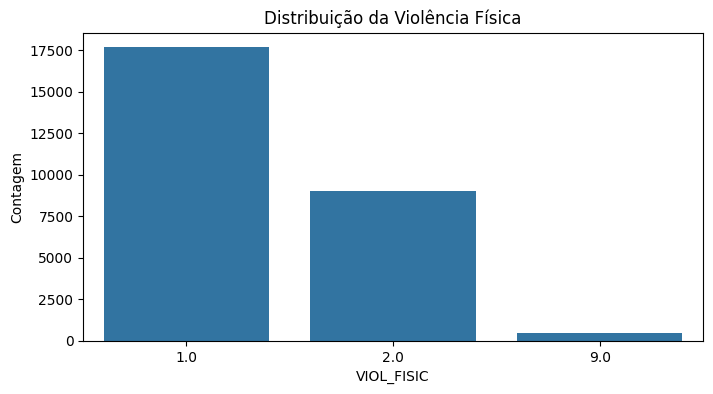

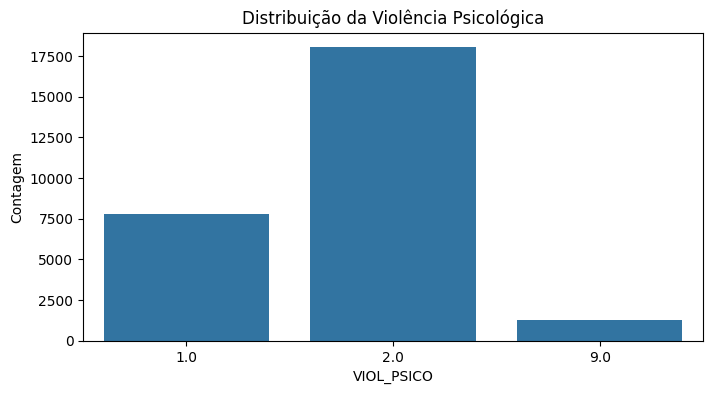

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#O "0" representa não e o "1" representa sim

# Gráfico para VIOL_FISIC
plt.figure(figsize=(8, 4))
sns.countplot(x=df_dados_violencia['VIOL_FISIC'])
plt.title('Distribuição da Violência Física')
plt.xlabel('VIOL_FISIC')
plt.ylabel('Contagem')
plt.show()

# Gráfico para VIOL_PSICO
plt.figure(figsize=(8, 4))
sns.countplot(x=df_dados_violencia['VIOL_PSICO'])
plt.title('Distribuição da Violência Psicológica')
plt.xlabel('VIOL_PSICO')
plt.ylabel('Contagem')
plt.show()


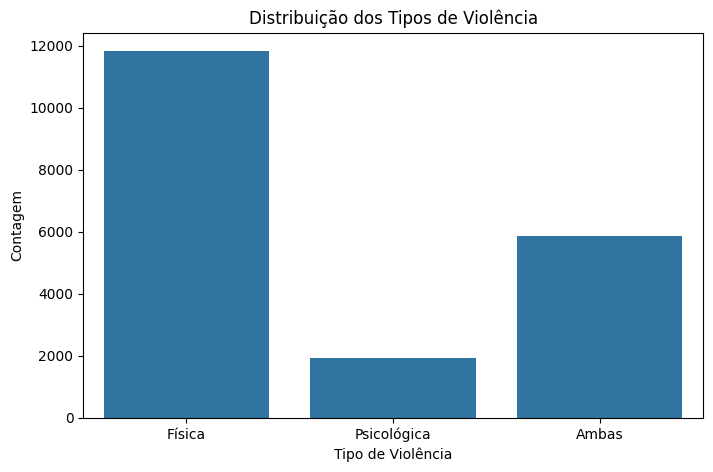

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma nova coluna categórica
def categorizar_violencia(row):
    if row['VIOL_FISIC'] == 1 and row['VIOL_PSICO'] == 1:
        return 'Ambas'
    elif row['VIOL_FISIC'] == 1:
        return 'Física'
    elif row['VIOL_PSICO'] == 1:
        return 'Psicológica'
    else:
        return 'Nenhuma'

df_dados_violencia['Tipo_Violencia'] = df_dados_violencia.apply(categorizar_violencia, axis=1)

# Filtra apenas os casos com algum tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] != 'Nenhuma']

# Plota o gráfico
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Violencia', data=df_filtrado, order=['Física', 'Psicológica', 'Ambas'])
plt.title('Distribuição dos Tipos de Violência')
plt.xlabel('Tipo de Violência')
plt.ylabel('Contagem')
plt.show()


0 = violencia psicol

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma nova coluna categórica
def categorizar_violencia(row):
    if row['VIOL_FISIC'] == 1 and row['VIOL_PSICO'] == 1:
        return 2
    elif row['VIOL_FISIC'] == 1:
        return 1
    elif row['VIOL_PSICO'] == 1:
        return 0
    else:
        return 4

df_dados_violencia['Tipo_Violencia'] = df_dados_violencia.apply(categorizar_violencia, axis=1)

# Filtra apenas os casos com algum tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] != 4]

In [ ]:
df_dados_violencia.columns

Index(['UF', 'ANO', 'DT_OCOR', 'DT_NASC', 'NU_IDADE_N', 'CS_RACA',
       'CS_ESCOL_N', 'LOCAL_OCOR', 'VIOL_FISIC', 'VIOL_PSICO', 'VIOL_TORT',
       'VIOL_SEXU', 'SEX_ASSEDI', 'SEX_ESTUPR', 'SEX_EXPLO', 'SEX_PORNO',
       'SEX_OUTRO', 'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ',
       'REL_EXCON', 'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO',
       'REL_CONHEC', 'REL_DESCO', 'AUTOR_SEXO', 'OUT_VEZES', 'GRUPO_IDADE',
       'Tipo_Violencia'],
      dtype='object')

In [ ]:
df_dados_violencia['Tipo_Violencia'].head()

,Tipo_Violencia
0,4
1,1
3,1
5,4
6,4


In [ ]:
viol_fisica = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] == 1]
# print(viol_fisica.head())
(df_dados_violencia['Tipo_Violencia'] == 1).sum()

np.int64(11826)

In [ ]:
# Casos com apenas VIOL_PSICO == 1
viol_psicologica = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] == 0]
# print(viol_psicologica.head())
(df_dados_violencia['Tipo_Violencia'] == 0).sum()

np.int64(1937)

In [ ]:
import pandas as pd

# Filtra apenas os casos com um único tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'].isin([0, 1])].copy()

# Define a classe como a coluna Tipo_Violencia
df_filtrado['CLASSE'] = df_filtrado['Tipo_Violencia']

# Remove colunas que não serão usadas como preditoras
X = df_filtrado.drop(columns=['VIOL_FISIC', 'VIOL_PSICO', 'Tipo_Violencia', 'CLASSE'])
y = df_filtrado['CLASSE']

# Exibe as informações
print("Formato final do dataset:")
print("Features (X):", X.shape)
print("Classe (y):", y.shape)
print("Distribuição das classes:\n", y.value_counts())


Formato final do dataset:
Features (X): (13763, 30)
Classe (y): (13763,)
Distribuição das classes:
 CLASSE
1    11826
0     1937
Name: count, dtype: int64


In [ ]:
df_filtrado.columns

Index(['UF', 'ANO', 'DT_OCOR', 'DT_NASC', 'NU_IDADE_N', 'CS_RACA',
       'CS_ESCOL_N', 'LOCAL_OCOR', 'VIOL_FISIC', 'VIOL_PSICO', 'VIOL_TORT',
       'VIOL_SEXU', 'SEX_ASSEDI', 'SEX_ESTUPR', 'SEX_EXPLO', 'SEX_PORNO',
       'SEX_OUTRO', 'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ',
       'REL_EXCON', 'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO',
       'REL_CONHEC', 'REL_DESCO', 'AUTOR_SEXO', 'OUT_VEZES', 'GRUPO_IDADE',
       'Tipo_Violencia', 'CLASSE'],
      dtype='object')

### BAIXANDO O ARQUIVO PKL

In [ ]:
import pickle

# Salva X
with open('X_tratado.pkl', 'wb') as f:
    pickle.dump(X, f)

# Salva y
with open('y_tratado.pkl', 'wb') as f:
    pickle.dump(y, f)


### QUANDO FOR IMPORTAR ELES PARA TREINAR:

In [ ]:
import pickle

# Carrega X
with open('X_tratado.pkl', 'rb') as f:
    X = pickle.load(f)

# Carrega y
with open('y_tratado.pkl', 'rb') as f:
    y = pickle.load(f)

# Verifica se tá certo
print(X.shape, y.shape)


(13763, 30) (13763,)
